In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import time

In [124]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 ship   cat horse  ship


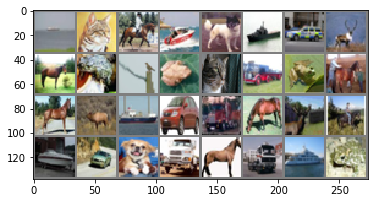

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Better_net(nn.Module):
    def __init__(self):
        super(Better_net, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding = 1)    
        self.bnm1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding = 1) 
        self.bnm2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding = 1) 
        self.bnm3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding = 1) 
        self.bnm4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, 3, padding = 1) 
        self.bnm5 = nn.BatchNorm2d(512)
        self.conv6 = nn.Conv2d(512, 512, 3, padding = 1) 
        self.bnm6 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512 * 4 * 4, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 10)
        

    def forward(self, x):
        x = F.relu(self.conv1(x)) 
        x = self.bnm1(x)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        #x = F.dropout2d(x, 0.2) 
        x = self.bnm2(x)
        x = F.relu(self.conv3(x))
        x = self.bnm3(x)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        #x = F.dropout2d(x, 0.3)
        x = self.bnm4(x)
        x = F.relu(self.conv5(x))
        x = self.bnm5(x)
        x = F.relu(self.conv6(x))
        x = F.max_pool2d(x, 2, 2)
        #x = F.dropout2d(x, 0.4)
        x = self.bnm6(x)
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Better_net().to(device)

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay = 1e-4)

In [0]:
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #print('Loss: ', running_loss)
        if i % 64000 == 63999:    # print every 2000 mini-batches
            print('[Epoch: %d, Batches: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Epoch: ', epoch + 1)
    print('Accuracy of the network: {}%'.format(
      100 * correct / total))

print('Finished Training')

Epoch:  1
Accuracy of the network: 85.75%
Epoch:  2
Accuracy of the network: 85.72%
Epoch:  3
Accuracy of the network: 85.73%
Epoch:  4
Accuracy of the network: 85.72%
Epoch:  5
Accuracy of the network: 85.74%
Epoch:  6
Accuracy of the network: 85.74%


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))